# 2-Qubit Teleportation Protocal

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt

#Create quantum and classical registers
qreg_q = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
creg_c5 = ClassicalRegister(1, 'c5')
creg_c6 = ClassicalRegister(1, 'c6')

#Create quantum circuit
circuit = QuantumCircuit(qreg_q, creg_c1, creg_c2, creg_c3, creg_c4, creg_c5, creg_c6)

# Initialize the state of the first two qubits
initial_state = [sqrt(0.1), sqrt(0.2), sqrt(0.3), sqrt(0.4)]
circuit.initialize(initial_state, [qreg_q[0], qreg_q[1]])

circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])

circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])

circuit.measure(qreg_q[0], creg_c1[0])
circuit.measure(qreg_q[2], creg_c2[0])
circuit.measure(qreg_q[1], creg_c3[0])
circuit.measure(qreg_q[3], creg_c4[0])
circuit.z(qreg_q[4]).c_if(creg_c1, 1)
circuit.x(qreg_q[4]).c_if(creg_c2, 1)
circuit.z(qreg_q[5]).c_if(creg_c3, 1)
circuit.x(qreg_q[5]).c_if(creg_c4, 1)

circuit.measure(qreg_q[4], creg_c5[0])
circuit.measure(qreg_q[5], creg_c6[0])

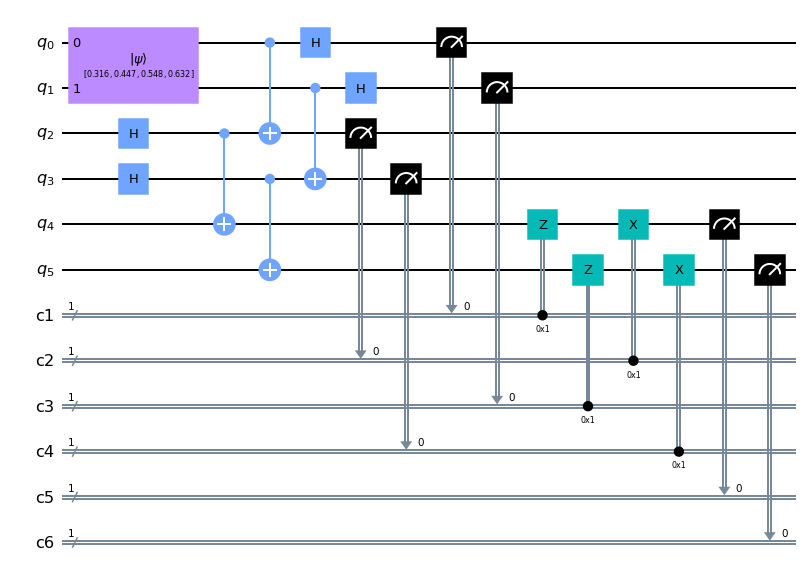

In [2]:
circuit.draw('mpl')

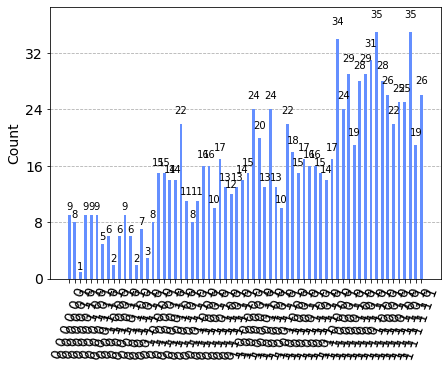

In [3]:
#use Qiskit AerSimulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)


<ipython-input-4-22359cf52fbf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


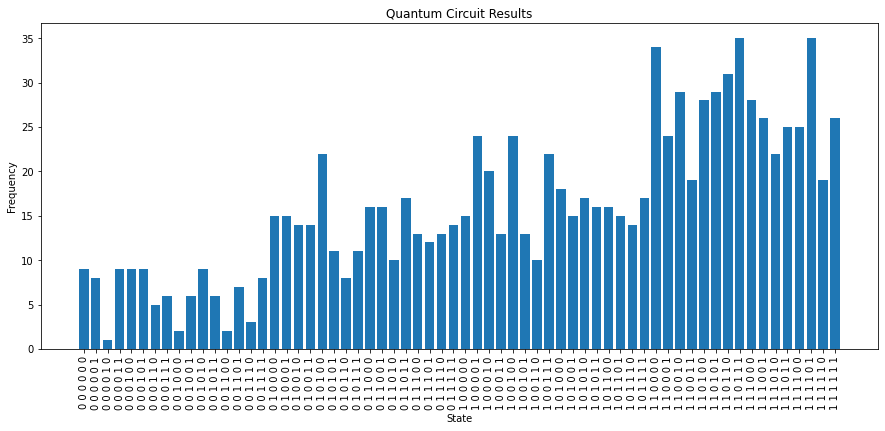

In [4]:
sorted_counts = {k: counts[k] for k in sorted(counts)}
x = list(sorted_counts.keys())
y = list(sorted_counts.values())
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x, y)
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Frequency')
ax.set_title('Quantum Circuit Results')
plt.show()

In [5]:
# initialize the counter
count_00 = 0
count_01 = 0
count_10 = 0
count_11 = 0
total_counts = 0

# Traverse the simulation results and be careful to replace the spaces in the key value (quantum state string)
for state, count in counts.items():
    total_counts += count
    first_two_bits = state.replace(" ", "")[:2]  #replace the spaces and take the first 2 bits
    if first_two_bits == "00":
        count_00 += count
    elif first_two_bits == "01":
        count_01 += count
    elif first_two_bits == "10":
        count_10 += count
    elif first_two_bits == "11":
        count_11 += count

# calculate the probability
prob_00 = count_00 / total_counts
prob_01 = count_01 / total_counts
prob_10 = count_10 / total_counts
prob_11 = count_11 / total_counts

print(f"Bob's qubit states '00': {prob_00}")
print(f"Bob's qubit states '01': {prob_01}")
print(f"Bob's qubit states '10': {prob_10}")
print(f"Bob's qubit states '11': {prob_11}")


Bob's qubit states '00': 0.0966796875
Bob's qubit states '01': 0.2158203125
Bob's qubit states '10': 0.2626953125
Bob's qubit states '11': 0.4248046875
